IMPORTACION DE LIBRERIAS

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
pd.options.display.max_columns = None



In [26]:
dftrain = pd.read_csv("hospitalizaciones_train.csv")
dftrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [27]:
#explorando las variables unicas
for i in range(15):
    print (dftrain.columns[i])
    print(dftrain.iloc[:,i].unique())
    print("\n")

Available Extra Rooms in Hospital
[ 4  2  7  3  5 10  6  1 21  8 11 13  9 14 24  0 12 20]


Department
['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']


Ward_Facility_Code
['D' 'B' 'E' 'F' 'A' 'C']


doctor_name
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']


staff_available
[ 0  2  8  7 10  5  9  3  6  4  1]


patientid
[33070 34808 44577 ... 40881 51342 63598]


Age
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']


gender
['Female' 'Male' 'Other']


Type of Admission
['Trauma' 'Urgent' 'Emergency']


Severity of Illness
['Extreme' 'Minor' 'Moderate']


health_conditions
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']


Visitors with Patient
[ 4  2  3 11  9  6  8 12  5  1 14  7 13 10 22 18  0 16 20 21 19 23 15 24
 17 30 32 25]


Insurance
['Yes' 'No']


Admission_Deposit
[2966.408696 3554.835677 5624.733654 ... 3816.99421  3841.577491
 4329.04

In [28]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

CONVIRTIENDO A VALORES NUMERICOS LOS DATOS CATEGORICOS

In [29]:
#Encoding de la columna Department
enc = OneHotEncoder(sparse=False)
departamentos=dftrain["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftrain["gynecoloy_encoded"]=enc2[:,0]
dftrain["anesthesia_encoded"]=enc2[:,1]
dftrain["TB & Chest disease:_encoded"]=enc2[:,2]
dftrain["radiotherapy_encoded"]=enc2[:,3]
dftrain["surgery_encoded"]=enc2[:,4]


[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [30]:
#Encoding de la columna staff_available
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftrain["staff_available"],bins, labels = labels)
dftrain["cats staff_available"]=cats
dftrain["cats staff_available"]=pd.factorize(dftrain['cats staff_available'])[0]

In [31]:
#Encoding de la columna age y reescalando con Minmax
y_encoder = LabelEncoder().fit(dftrain['Age'])
dftrain["Age_encoded"] = y_encoder.transform(dftrain['Age'])

In [32]:
#Encoding de la columna age y reescalando con Minmax
y_encoder = LabelEncoder().fit(dftrain['Age'])
dftrain["Age_encoded"] = y_encoder.transform(dftrain['Age'])
scaler = MinMaxScaler() 
dftrain["Age_encoded"]=scaler.fit_transform(dftrain[["Age_encoded"]])

In [33]:
#Encoding de la columna gender
enc = OneHotEncoder(sparse=False)
genero=dftrain["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Female_encoded"]=enc2[:,0]
dftrain["Male_encoded"]=enc2[:,1]
dftrain["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [34]:
#Encoding de la columna Type of Admission
enc = OneHotEncoder(sparse=False)
genero=dftrain["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Trauma_encoded"]=enc2[:,0]
dftrain["Urgent_encoded"]=enc2[:,1]
dftrain["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [35]:
#Encoding de la columna Severity of illnes y haciendo MinMaxScaler() 
dftrain["Severity of Illness_encoded"]=dftrain["Severity of Illness"]
dftrain["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftrain["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
scaler = MinMaxScaler() 
dftrain["Severity of Illness_encoded"]=scaler.fit_transform(dftrain[["Severity of Illness_encoded"]])

In [36]:
#Encodign de la columna health_conditions
enc = OneHotEncoder(sparse=False)
genero=dftrain["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftrain["Diabetes_encoded"]=enc2[:,0]
dftrain["Heart disease_encoded"]=enc2[:,1]
dftrain["None_encoded"]=enc2[:,2]
dftrain["hcOther_encoded"]=enc2[:,3]
dftrain["Asthama_encoded"]=enc2[:,4]
dftrain["High Blood Pressure_encoded"]=enc2[:,5]


[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


In [40]:
#encoding de la columna stat (in days a binario)
bins=[-1,8,51]
labels=[0,1]
cats=pd.cut(dftrain["Stay (in days)"],bins, labels = labels)
dftrain["cats stay"]=cats
dftrain["cats stay"]=pd.factorize(dftrain['cats stay'])[0]
dftrain.head(5)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded,Visitors with Patient_encoded,Insurance_encoded,Admission_Deposit_encoded,cats stay
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8,0.0,0.0,1.0,0.0,0.0,0,0.444444,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.1250,1,-1.677467,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9,0.0,0.0,1.0,0.0,0.0,1,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0625,0,-1.115679,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7,0.0,0.0,1.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0625,1,0.860510,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8,0.0,0.0,1.0,0.0,0.0,1,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.1250,0,0.086622,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34,0.0,1.0,0.0,0.0,0.0,1,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0625,0,0.425666,1


In [14]:
dftrainfinal=dftrain.drop(columns=list(dftrain.columns)[0:15])
dftrainfinalx=dftrainfinal.drop(columns="cats stay")
dftrainfinaly=dftrain["cats stay"]

In [15]:
dftrainfinalx.head()

,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,radiotherapy_encoded,surgery_encoded,cats staff_available,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Emergency_encoded,Severity of Illness_encoded,Diabetes_encoded,Heart disease_encoded,None_encoded,hcOther_encoded,Asthama_encoded,High Blood Pressure_encoded
0,0.0,0.0,1.0,0.0,0.0,0,0.444444,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1,0.222222,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1,0.777778,0.0,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
#explorando las variables unicas
for i in range(15):
    print (dftrainfinalx.columns[i])
    print(dftrainfinalx.iloc[:,i].unique())
    print("\n")

gynecoloy_encoded
[0. 1.]


anesthesia_encoded
[0. 1.]


TB & Chest disease:_encoded
[1. 0.]


radiotherapy_encoded
[0. 1.]


surgery_encoded
[0. 1.]


cats staff_available
[0 1]


Age_encoded
[0.44444444 0.33333333 0.22222222 0.77777778 0.11111111 0.55555556
 0.66666667 0.88888889 1.         0.        ]


Female_encoded
[1. 0.]


Male_encoded
[0. 1.]


Other_encoded
[0. 1.]


Trauma_encoded
[0. 1.]


Urgent_encoded
[1. 0.]


Emergency_encoded
[0. 1.]


Severity of Illness_encoded
[1.  0.  0.5]


Diabetes_encoded
[0. 1.]




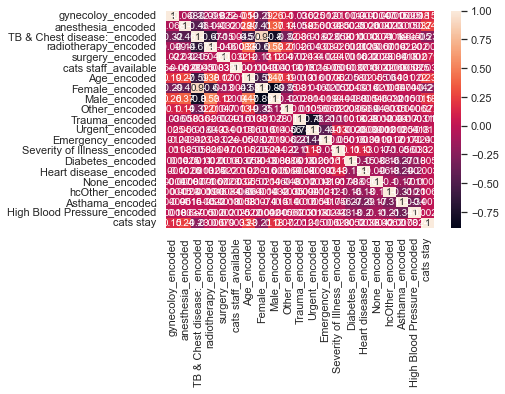

In [17]:
corr = dftrainfinal.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

In [18]:
dftrainfinal.columns

Index(['gynecoloy_encoded', 'anesthesia_encoded',
       'TB & Chest disease:_encoded', 'radiotherapy_encoded',
       'surgery_encoded', 'cats staff_available', 'Age_encoded',
       'Female_encoded', 'Male_encoded', 'Other_encoded', 'Trauma_encoded',
       'Urgent_encoded', 'Emergency_encoded', 'Severity of Illness_encoded',
       'Diabetes_encoded', 'Heart disease_encoded', 'None_encoded',
       'hcOther_encoded', 'Asthama_encoded', 'High Blood Pressure_encoded',
       'cats stay'],
      dtype='object')

In [19]:
#quitando las variables con menos correlacion segundo caso
dftrainfinal2=dftrainfinal.drop(columns=["radiotherapy_encoded","cats staff_available",'Emergency_encoded','Diabetes_encoded','Heart disease_encoded','None_encoded','hcOther_encoded','Asthama_encoded','High Blood Pressure_encoded'])
dftrainfinal2x=dftrainfinal2.drop(columns="cats stay")
dftrainfinal2y=dftrainfinal2["cats stay"]

In [20]:
#quitando las variables con menos correlacion tercer caso
dftrainfinal3=dftrainfinal.drop(columns=["radiotherapy_encoded","surgery_encoded","cats staff_available",'Other_encoded','Trauma_encoded','Urgent_encoded','Emergency_encoded','Severity of Illness_encoded','Diabetes_encoded','Heart disease_encoded','None_encoded','hcOther_encoded','Asthama_encoded','High Blood Pressure_encoded'])
dftrainfinal3x=dftrainfinal3.drop(columns="cats stay")
dftrainfinal3y=dftrainfinal3["cats stay"]

In [21]:
dftrainfinal2.head()

,gynecoloy_encoded,anesthesia_encoded,TB & Chest disease:_encoded,surgery_encoded,Age_encoded,Female_encoded,Male_encoded,Other_encoded,Trauma_encoded,Urgent_encoded,Severity of Illness_encoded,cats stay
0,0.0,0.0,1.0,0.0,0.444444,1.0,0.0,0.0,0.0,1.0,1.0,0
1,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1
2,0.0,0.0,1.0,0.0,0.222222,1.0,0.0,0.0,0.0,1.0,1.0,0
3,0.0,0.0,1.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.5,0
4,0.0,1.0,0.0,0.0,0.777778,0.0,1.0,0.0,0.0,1.0,0.5,1


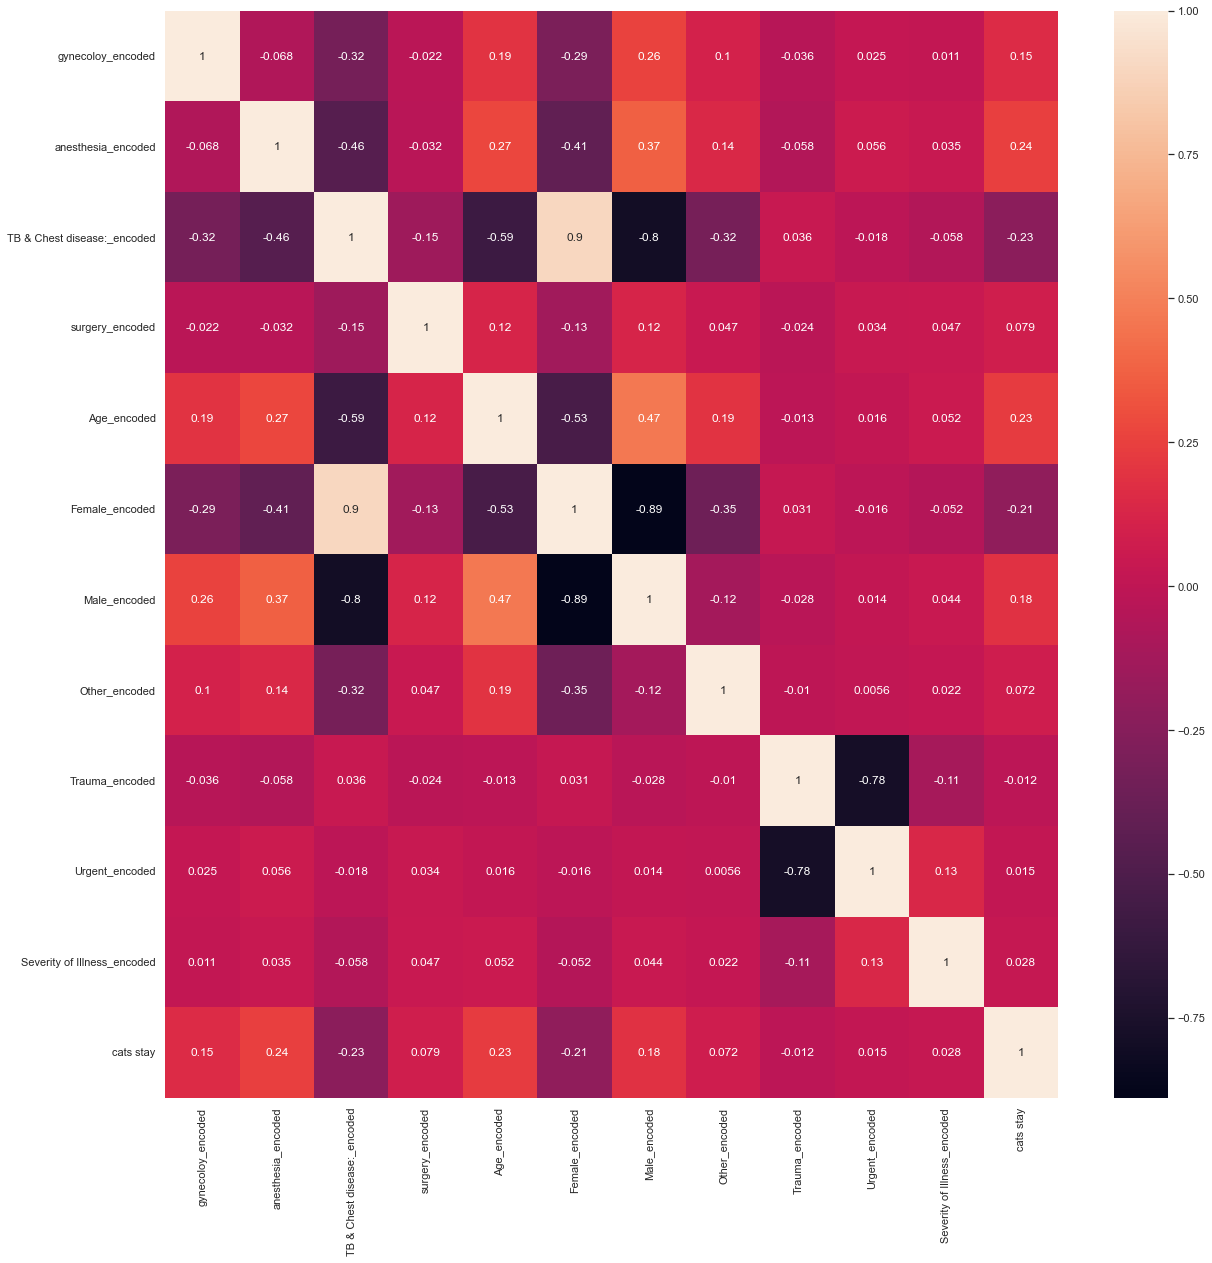

In [22]:
corr = dftrainfinal2.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

APLICAMOS EL ENCODIGN PARA EL CSV DE "TEST"

In [23]:
dftest = pd.read_csv("hospitalizaciones_test.csv")
dftest.head(2)

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324


In [24]:
#Encoding de la columna Department
enc = OneHotEncoder(sparse=False)
departamentos=dftest["Department"].values.reshape(-1,1)
enc.fit(departamentos)
enc2=enc.transform(departamentos)
print(enc.categories_)
dftest["gynecoloy_encoded"]=enc2[:,0]
dftest["anesthesia_encoded"]=enc2[:,1]
dftest["TB & Chest disease:_encoded"]=enc2[:,2]
dftest["radiotherapy_encoded"]=enc2[:,3]
dftest["surgery_encoded"]=enc2[:,4]

[array(['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy',
       'surgery'], dtype=object)]


In [25]:
#Encoding de la columna staff_available
bins=[-1,0,10]
labels=[0,1]
cats=pd.cut(dftest["staff_available"],bins, labels = labels)
dftest["cats staff_available"]=cats
dftest["cats staff_available"]=pd.factorize(dftest['cats staff_available'])[0]

In [26]:
#Encoding de la columna age y reescalando con Minmax
y_encoder = LabelEncoder().fit(dftest['Age'])
dftest["Age_encoded"] = y_encoder.transform(dftest['Age'])

In [27]:
#Encoding de la columna age y reescalando con Minmax
y_encoder = LabelEncoder().fit(dftest['Age'])
dftest["Age_encoded"] = y_encoder.transform(dftest['Age'])
scaler = MinMaxScaler() 
dftest["Age_encoded"]=scaler.fit_transform(dftest[["Age_encoded"]])

In [28]:
#Encoding de la columna gender
enc = OneHotEncoder(sparse=False)
genero=dftest["gender"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Female_encoded"]=enc2[:,0]
dftest["Male_encoded"]=enc2[:,1]
dftest["Other_encoded"]=enc2[:,2]

[array(['Female', 'Male', 'Other'], dtype=object)]


In [29]:
#Encoding de la columna Type of Admission
enc = OneHotEncoder(sparse=False)
genero=dftest["Type of Admission"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Trauma_encoded"]=enc2[:,0]
dftest["Urgent_encoded"]=enc2[:,1]
dftest["Emergency_encoded"]=enc2[:,2]

[array(['Emergency', 'Trauma', 'Urgent'], dtype=object)]


In [30]:
#Encoding de la columna Severity of illnes y haciendo MinMaxScaler() 
dftest["Severity of Illness_encoded"]=dftest["Severity of Illness"]
dftest["Severity of Illness_encoded"].replace("Minor",0,inplace=True)
dftest["Severity of Illness_encoded"].replace("Moderate",1,inplace=True)
dftest["Severity of Illness_encoded"].replace("Extreme",2,inplace=True)
scaler = MinMaxScaler() 
dftest["Severity of Illness_encoded"]=scaler.fit_transform(dftest[["Severity of Illness_encoded"]])

In [31]:
#Encodign de la columna health_conditions
enc = OneHotEncoder(sparse=False)
genero=dftest["health_conditions"].values.reshape(-1,1)
enc.fit(genero)
enc2=enc.transform(genero)
print(enc.categories_)
dftest["Diabetes_encoded"]=enc2[:,0]
dftest["Heart disease_encoded"]=enc2[:,1]
dftest["None_encoded"]=enc2[:,2]
dftest["hcOther_encoded"]=enc2[:,3]
dftest["Asthama_encoded"]=enc2[:,4]
dftest["High Blood Pressure_encoded"]=enc2[:,5]

[array(['Asthama', 'Diabetes', 'Heart disease', 'High Blood Pressure',
       'None', 'Other'], dtype=object)]


SE OBTIENE 3 DIFERENTES DATAFRAME CON DISTINTAS CANTIDA DE COLUMNA PARA MULTIPLES EVALUACIONES

In [32]:
dftestfinal=dftest.drop(columns=list(dftrain.columns)[0:14])

In [33]:
#quitando las variables con menos correlacion para segundo caso
dftestfinal2=dftestfinal.drop(columns=["radiotherapy_encoded","cats staff_available",'Emergency_encoded','Diabetes_encoded','Heart disease_encoded','None_encoded','hcOther_encoded','Asthama_encoded','High Blood Pressure_encoded'])

In [34]:
#quitando las variables con menos correlacion tercer caso
dftestfinal3=dftestfinal.drop(columns=["radiotherapy_encoded","surgery_encoded","cats staff_available",'Other_encoded','Trauma_encoded','Urgent_encoded','Emergency_encoded','Severity of Illness_encoded','Diabetes_encoded','Heart disease_encoded','None_encoded','hcOther_encoded','Asthama_encoded','High Blood Pressure_encoded'])

PROBANDO MODELOS

PRIMERA PRUEBA :

In [35]:
#Probamos para regresion logistica para trainfinal accuracy primera entrega
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dftrainfinaly, cv=5,scoring="accuracy")
print(f"El accuracy promedio es : {tree_scores.mean()}")
print(f"El accuracy por division es : {tree_scores}")
#Probamos para regresion logistica para trainfinal recall
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dftrainfinaly, cv=5,scoring="recall")
print(f"El recall promedio es : {tree_scores.mean()}")
print(f"El recall por division es : {tree_scores}")

El accuracy promedio es : 0.5834829268292683
El accuracy por division es : [0.58523171 0.57939024 0.58457317 0.58407317 0.58414634]
El recall promedio es : 0.8406442790861627
El recall por division es : [0.85312139 0.81618151 0.84949983 0.84296145 0.84145721]


In [36]:
# Entrenamos el modelo de regresion logistica
clf = LogisticRegression(max_iter=1000)
clf.fit(dftrainfinalx,dftrainfinaly)
y_pred = clf.predict(dftrainfinalx)
print(f"El accuracy es : {accuracy_score(dftrainfinaly,y_pred)}")
print(f"El recall es : {recall_score(dftrainfinaly,y_pred)}")

El accuracy es : 0.5833780487804878
El recall es : 0.8436550568484354


In [37]:
#exportando a csv la prediccion con hospitalizaciones_test
y_predtest=clf.predict(dftestfinal)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94.csv",index=False)

SEGUNDA PRUEBA :

In [80]:
#Probamos para regresion logistica para trainfinal2 accuracy
X_train, X_test, y_train, y_test = train_test_split(dftrainfinalx, dftrainfinaly, test_size=0.70, random_state=40)
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dftrainfinaly, cv=5,scoring="accuracy")
print(f"El accuracy promedio es : {tree_scores.mean()}")
print(f"El accuracy por division es : {tree_scores}")
#Probamos para regresion logistica para trainfinal2 recall
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinalx, dftrainfinaly, cv=5,scoring="recall")
print(f"El recall promedio es : {tree_scores.mean()}")
print(f"El recall por division es : {tree_scores}")

El accuracy promedio es : 0.5834829268292683
El accuracy por division es : [0.58523171 0.57939024 0.58457317 0.58407317 0.58414634]
El recall promedio es : 0.8406442790861627
El recall por division es : [0.85312139 0.81618151 0.84949983 0.84296145 0.84145721]


In [85]:
# Entrenamos el modelo de regresion logistica
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal3x, dftrainfinal3y, test_size=0.30, random_state=40)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
y_predtrain = clf.predict(X_train)
y_predtest=clf.predict(X_test)
print(f"El accuracy es : {accuracy_score(y_train,y_predtrain)}")
print(f"El recall es : {recall_score(y_train,y_predtrain)}")
print(f"El accuracy es : {accuracy_score(y_test,y_predtest)}")
print(f"El recall es : {recall_score(y_test,y_predtest)}")


El accuracy es : 0.5842613240418119
El recall es : 0.8749713480664837
El accuracy es : 0.5847560975609756
El recall es : 0.8776275393559344


In [40]:
#exportando a csv la prediccion con hospitalizaciones_test
y_predtest=clf.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v2.csv",index=False)

TERCERA PRUEBA :

In [41]:
#Probamos para regresion logistica para trainfinal3 accuracy
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinal3x, dftrainfinal3y, cv=5,scoring="accuracy")
print(f"El accuracy promedio es : {tree_scores.mean()}")
print(f"El accuracy por division es : {tree_scores}")
#Probamos para regresion logistica para trainfinal3 recall
tree = LogisticRegression(max_iter=1000)
tree_scores = cross_val_score(tree, dftrainfinal3x, dftrainfinal3y, cv=5,scoring="recall")
print(f"El recall promedio es : {tree_scores.mean()}")
print(f"El recall por division es : {tree_scores}")

El accuracy promedio es : 0.584409756097561
El accuracy por division es : [0.58736585 0.58191463 0.58567073 0.58453659 0.58256098]
El recall promedio es : 0.8757673779284982
El recall por division es : [0.89152947 0.86120627 0.87905957 0.87187518 0.87516639]


In [42]:
# Entrenamos el modelo de regresion logistica
clf = LogisticRegression(max_iter=1000)
clf.fit(dftrainfinal3x,dftrainfinal3y)
y_pred = clf.predict(dftrainfinal3x)
print(f"El accuracy es : {accuracy_score(dftrainfinal3y,y_pred)}")
print(f"El recall es : {recall_score(dftrainfinal3y,y_pred)}")

El accuracy es : 0.584409756097561
El recall es : 0.8757673755755316


In [43]:
#exportando a csv la prediccion con hospitalizaciones_test
y_predtest=clf.predict(dftestfinal3)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v3.csv",index=False)

CUARTA PRUEBA :

In [ ]:
lr=LogisticRegression(max_iter=1000)
# Hyperparameter search space
search_space = {
    'penalty': ['none','l2', 'l1', 'elasticnet'],
}

# Probamos la estrategia grid search

from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = GridSearchCV(lr, param_grid=search_space, cv=5,scoring="accuracy")

# Entrenamos
model.fit(dftrainfinalx, dfy)
model.best_params_

In [58]:

from sklearn.model_selection import GridSearchCV
from scipy import stats

# Hyperparameter search space
search_space = {
    'svc__kernel': ['sigmoid', 'rbf'],
    
}

# Probamos la estrategia grid search

from sklearn.model_selection import GridSearchCV

# Le pasamos la grilla que creamos
model = RandomizedSearchCV(pipe_svm, search_space, cv=3,n_iter=2,scoring="accuracy")

# Entrenamos
model.fit(dftrainfinalx10.drop(columns="cats stay"), dftrainfinalx10["cats stay"])
model.best_params_

{'svc__kernel': 'rbf'}

In [47]:
#Prediccion numero 4 Para trainfinal 2
pipe_svm = Pipeline([('pca', PCA(n_components=2)),
			('svc', svm.SVC())])

In [51]:
dftraifinal2f=dftrainfinal2.sample(frac=0.05)
dftrainfinal2xf=dftraifinal2f.drop(columns="cats stay")
dftrainfinal2yf=dftraifinal2f["cats stay"]

In [52]:
# Lo entrenamos

pipe_svm.fit(dftrainfinal2xf,dftrainfinal2yf)
y_predtest=pipe_svm.predict(dftrainfinal2x)

In [54]:
print(f"acurracy es : {accuracy_score(dftrainfinal2y,y_predtest)}")
print(f"recall es : {recall_score(dftrainfinal2y,y_predtest)}")

acurracy es : 0.6229658536585366
recall es : 1.0


In [57]:
#exportando a csv la prediccion para testinal2  con pipeline(PCA,SVC) con hospitalizaciones_test
y_predtest=pipe_svm.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v4.csv",index=False)

QUINTA PRUEBA :

In [87]:
#Prediccion numero 5 Para trainfinal 2
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal3x, dftrainfinal3y, test_size=0.30, random_state=40)
pipe_svm = Pipeline([('pca', PCA(n_components=3)),
			('svc', svm.SVC())])

In [59]:
dftraifinal2f=dftrainfinal2.sample(frac=0.05)
dftrainfinal2xf=dftraifinal2f.drop(columns="cats stay")
dftrainfinal2yf=dftraifinal2f["cats stay"]

In [89]:
# Lo entrenamos

pipe_svm.fit(X_train,y_train)
y_predtrain=pipe_svm.predict(X_train)

In [61]:
print(f"acurracy es : {accuracy_score(y_train,y_predtrain)}")
print(f"recall es : {recall_score(y_train,y_predtrain)}")

acurracy es : 0.621919512195122
recall es : 0.9761800357064554


In [62]:
#exportando a csv la prediccion para testinal2  con pipeline(PCA,SVC) con hospitalizaciones_test
y_predtest=pipe_svm.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v5.csv",index=False)

SEXTA PRUEBA :

In [63]:
#Prediccion numero 6 Para trainfinal 2
pipe_svm = Pipeline([('pca', PCA(n_components=4)),
			('svc', svm.SVC())])

In [64]:
dftraifinal2f=dftrainfinal2.sample(frac=0.05)
dftrainfinal2xf=dftraifinal2f.drop(columns="cats stay")
dftrainfinal2yf=dftraifinal2f["cats stay"]

In [65]:
# Lo entrenamos
pipe_svm.fit(dftrainfinal2xf,dftrainfinal2yf)
y_predtest=pipe_svm.predict(dftrainfinal2x)

In [66]:
print(f"acurracy es : {accuracy_score(dftrainfinal2y,y_predtest)}")
print(f"recall es : {recall_score(dftrainfinal2y,y_predtest)}")

acurracy es : 0.621919512195122
recall es : 0.9761800357064554


In [67]:
#exportando a csv la prediccion para testinal2  con pipeline(PCA,SVC) con hospitalizaciones_test
y_predtest=pipe_svm.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v6.csv",index=False)

SEPTIMA PRUEBA :

In [35]:
#Prediccion numero 7 Para trainfinal 2
pipe_dtc = Pipeline([('pca', PCA(n_components=4)),
			('dtc', DecisionTreeClassifier(max_depth=5))])


In [36]:
dftraifinal2f=dftrainfinal2.sample(frac=1)
dftrainfinal2xf=dftraifinal2f.drop(columns="cats stay")
dftrainfinal2yf=dftraifinal2f["cats stay"]

In [37]:
# Lo entrenamos
pipe_dtc.fit(dftrainfinal2xf,dftrainfinal2yf)
y_predtest=pipe_dtc.predict(dftrainfinal2x)

In [39]:
pipe_dtc.feature_names_in_

array(['gynecoloy_encoded', 'anesthesia_encoded',
       'TB & Chest disease:_encoded', 'surgery_encoded', 'Age_encoded',
       'Female_encoded', 'Male_encoded', 'Other_encoded',
       'Trauma_encoded', 'Urgent_encoded', 'Severity of Illness_encoded'],
      dtype=object)

In [38]:
print(f"acurracy es : {accuracy_score(dftrainfinal2y,y_predtest)}")
print(f"recall es : {recall_score(dftrainfinal2y,y_predtest)}")

acurracy es : 0.6568829268292683
recall es : 0.9860736993767031


OCTABA  PRUEBA :

In [55]:
#Prediccion numero 8 Para trainfinal 2 / segunda entrega
tree= DecisionTreeClassifier(max_depth=7)
# Lo entrenamos
tree.fit(dftrainfinal2x,dftrainfinal2y)
y_predtest=pipe_dtc.predict(dftrainfinal2x)

In [58]:
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10], 
}

In [59]:
from sklearn.model_selection import RandomizedSearchCV

tree= DecisionTreeClassifier()
model = RandomizedSearchCV(tree, param_dist,n_iter=100, random_state=0, cv=5)

# Entrenamos knn con la grilla
model.fit(dftrainfinal2x, dftrainfinal2y)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
                   random_state=0)

In [60]:
model.best_params_

{'max_depth': 9, 'criterion': 'gini'}

In [76]:
tree2=DecisionTreeClassifier(max_depth=9,criterion="gini")
tree2.fit(dftrainfinal2x,dftrainfinal2y)
y_predtest=tree2.predict(dftestfinal2)

In [79]:
print(cross_val_score(tree2,dftrainfinal2x,dftrainfinal2y,cv=5,scoring="accuracy"))
print(cross_val_score(tree2,dftrainfinal2x,dftrainfinal2y,cv=5,scoring="recall"))

[0.6894878  0.68823171 0.68863415 0.69045122 0.68871951]
[0.9731809  0.97459037 0.97588239 0.97674373 0.97167411]


In [74]:
print(f"acurracy es : {accuracy_score(dftrainfinal2y,y_predtest)}")
print(f"recall es : {recall_score(dftrainfinal2y,y_predtest)}")

acurracy es : 0.6891048780487805
recall es : 0.9744142888464309


In [75]:
#exportando a csv la prediccion para testinal2   con hospitalizaciones_test / segunda entrega
y_predtest=tree2.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v7.csv",index=False)

NOVENA PRUEBA :

In [85]:
# novena prediccion 4ta entrega/4ta entrega
X_train, X_test, y_train, y_test = train_test_split(dftrainfinalx, dftrainfinaly, test_size=0.30, random_state=40) # Separamos nuestros 
                                                                                           #datos, dejando un 30% 
                                                                                           #para testear

In [86]:
#Prediccion numero 9 Para trainfinal
param_dist = {'criterion':["gini", "entropy", "log_loss"],
              'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], }

tree= DecisionTreeClassifier()
model = RandomizedSearchCV(tree, param_dist,n_iter=100, random_state=0, cv=5,scoring="accuracy")

# Entrenamos knn con la grilla
model.fit(X_train, y_train)
model.best_params_

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'max_depth': 7, 'criterion': 'gini'}

In [87]:
tree2=DecisionTreeClassifier(max_depth=7,criterion="gini")
tree2.fit(X_train,y_train)
y_predtrain=tree2.predict(X_train)
y_predtest=tree2.predict(X_test)

In [88]:
print(f"acurracy es : {accuracy_score(y_train,y_predtrain)}")
print(f"recall es : {recall_score(y_train,y_predtrain)}")

acurracy es : 0.6887003484320557
recall es : 0.954173678237389


In [89]:
print(f"acurracy es : {accuracy_score(y_test,y_predtest)}")
print(f"recall es : {recall_score(y_test,y_predtest)}")

acurracy es : 0.6874065040650407
recall es : 0.9533346397543928


In [90]:
#exportando a csv la prediccion para testinal2 /4ta entrega
y_predtesttest=tree2.predict(dftestfinal)
y_predtestcsv=pd.DataFrame(list(y_predtesttest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v9.csv",index=False)

DECIMA PRUEBA:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(dftrainfinal2x, dftrainfinal2y, test_size=0.70, random_state=40) # Separamos nuestros 
                                                                                           #datos, dejando un 30% 
                                                                                           #para testear

In [36]:
#prediccion 10 entrega #3

param_grid = {'n_neighbors':np.arange(1, 10),
              }

In [37]:
knn = KNeighborsClassifier()

In [38]:

# Le pasamos la grilla que creamos
model = RandomizedSearchCV(knn, param_grid, n_iter=5,cv=5,scoring="accuracy")

# Entrenamos
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy')

In [39]:
model.best_params_

{'n_neighbors': 7}

In [40]:
y_predtrain=model.predict(X_train)
print(f"acurracy es : {accuracy_score(y_train,y_predtrain)}")
print(f"recall es : {recall_score(y_train,y_predtrain)}")

acurracy es : 0.6681626016260163
recall es : 0.8104052287581699


In [41]:
y_predtest=model.predict(X_test)
print(f"acurracy es : {accuracy_score(y_test,y_predtest)}")
print(f"recall es : {recall_score(y_test,y_predtest)}")

acurracy es : 0.6712439024390244
recall es : 0.8129010261798832


In [42]:
#exportando a csv la prediccion para testinal2
y_predtesttest=model.predict(dftestfinal2)
y_predtestcsv=pd.DataFrame(list(y_predtesttest),columns=["pred"])
y_predtestcsv.to_csv("pred/isaacpc94v10.csv",index=False)